<a href="https://colab.research.google.com/github/reshmi56/Form-validation/blob/main/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
heart_data=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
labels=['No Diabetes','Diabetes']
diabetes_yes=heart_data[heart_data['diabetes']==1]
diabetes_no=heart_data[heart_data['diabetes']==0]
values=[len(diabetes_no),len(diabetes_yes)]
fig=go.Figure(data=[go.Pie(labels=labels,values=values)])
fig.update_layout(
    title_text="Analysis on Diabetes"
)
fig.show()

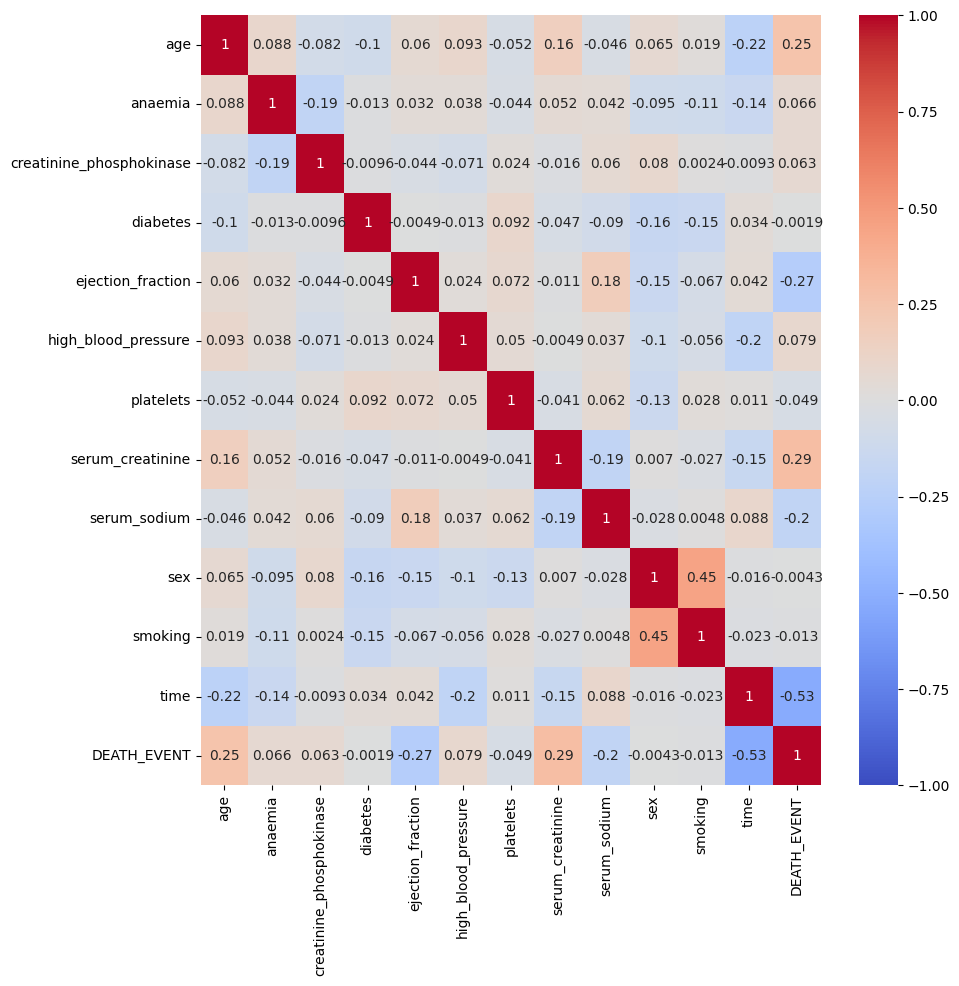

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(),vmin=-1,cmap='coolwarm',annot=True);

Data Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
Feature=['time','ejection_fraction','serum_creatinine']
x=heart_data[Feature]
y=heart_data["DEATH_EVENT"]

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_re=LogisticRegression()

In [ ]:
log_re.fit(xtrain,ytrain)
log_re_pred=log_re.predict(xtest)

In [ ]:
log_acc=accuracy_score(ytest,log_re_pred)
print("Logistic Accuracy: ","{:.2f}%".format(100*log_acc))

Logistic Accuracy:  90.00%


Computes a confusion matrix from the actual and predicted labels.
Initializes a new plot figure.
Plots the confusion matrix using a custom function with specific size and color settings.
Sets the title of the plot.
Labels the x and y axes with custom labels ("Heart Not Failed", "Heart Fail") and sets their font size.
Displays the plot.





In [ ]:
from mlxtend.plotting import plot_confusion_matrix

<Figure size 640x480 with 0 Axes>

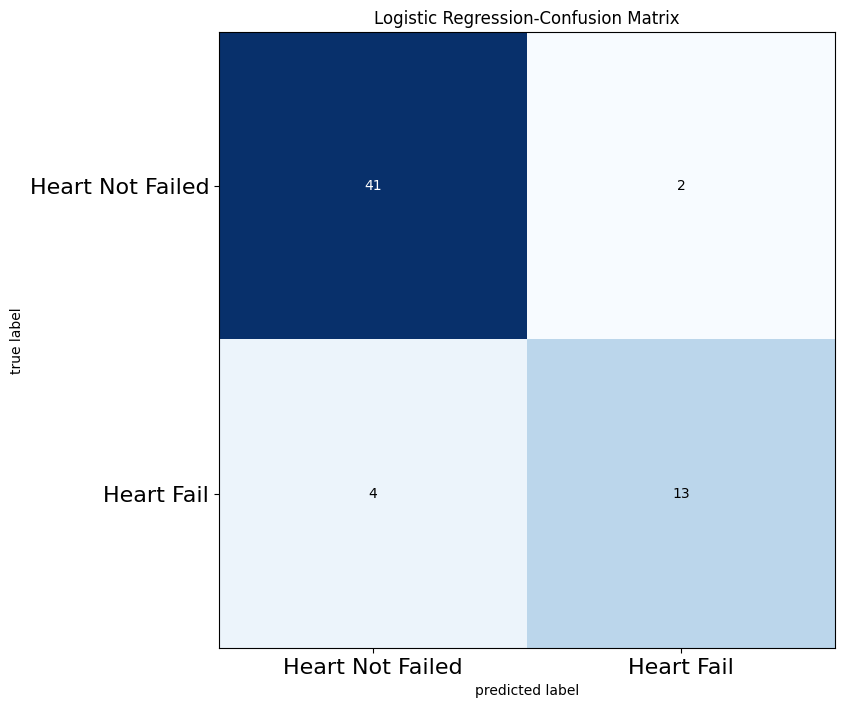

In [ ]:
cm=confusion_matrix(ytest,log_re_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8),hide_ticks=True,cmap=plt.cm.Blues)
plt.title("Logistic Regression-Confusion Matrix")
plt.xticks(range(2),["Heart Not Failed","Heart Fail"],fontsize=16)
plt.yticks(range(2),["Heart Not Failed","Heart Fail"],fontsize=16)
plt.show()